#### Обработка данных

In [1]:
import pandas as pd
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные
data2 = pd.read_csv('data/experiment2.csv')
data3 = pd.read_csv('data/experiment3.csv')

In [6]:
data1['I'] = 1.32 * (1.0/2000) * (1.0/(data1['R2']*1000 + 47.5))

In [9]:
data1['x/2a'] = data1['x']/2.48

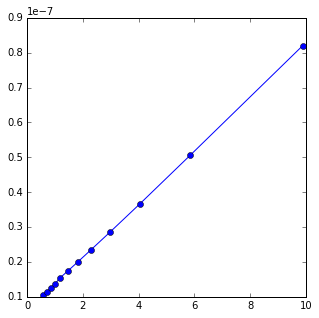

In [10]:
plt.figure(1, figsize=(5,5))
plt.plot(data1['x/2a'], data1['I'], marker='o', color='b')
plt.show()

In [12]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data1['x/2a'], data1['I']*(10**8), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.5992422) + (0.7666629)*x
(+-)(0.0098429) + (+-)(0.0026031)*x


In [15]:
data2['theta'] = numpy.log(data2['x1'] * np.reciprocal(data2['x2']))

In [24]:
data2['1/th'] = np.reciprocal(np.square(data2['theta']))

In [25]:
data2['R+R0'] = np.square(data2['R']*1000 + 47.5)

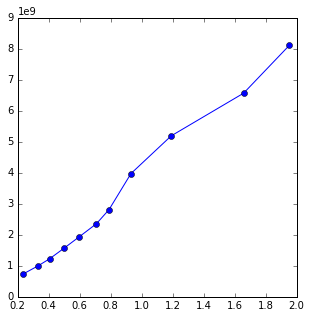

In [26]:
plt.figure(1, figsize=(5,5))
plt.plot(data2['1/th'], data2['R+R0'], marker='o', color='b')
plt.show()

In [40]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, data2['R+R0'], data2['1/th']*(10**8), method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (12252592.9280516) + (0.0224272)*x
(+-)(2972001.9584130) + (+-)(0.0007465)*x


In [43]:
data3

,R,x
0,50.0,20.8
1,45.0,20.1
2,40.0,19.5
3,35.0,19.0
4,30.0,18.5
5,25.0,17.6
6,20.0,16.5
7,15.0,14.8
8,13.0,13.5
9,11.0,12.9


In [51]:
data3['R+R0'] = numpy.reciprocal(data3['R']*1000 + 47.5)

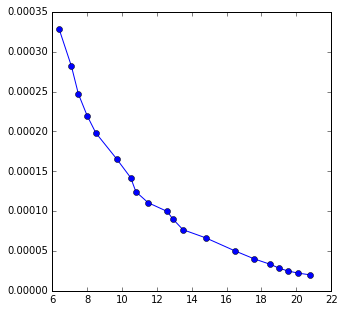

In [52]:
plt.figure(1, figsize=(5,5))
plt.plot(data3['x'], data3['R+R0'], marker='o', color='b')
plt.show()